In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#from adalines import adaline
#from plot_decision_regions import plot_decision_regions

#this is the data from pandas
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

#x is the features for the classification
#y is the flower catergory names or the correct answers.
x = df.iloc[:, 0:4].values
y = df.iloc[:,4]

#standarizing using numpy
X_std = np.copy(x)
X_std[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
X_std[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()

#turn y into a new 3XN array to prepare for OvR
#oneHotEncoded is in this order: iris-setosa, iris-versicolor, iris-virginica
from sklearn. preprocessing import LabelEncoder, OneHotEncoder
labelEncoded = LabelEncoder().fit_transform(y).reshape(-1,1)
oneHotEncoded = OneHotEncoder().fit_transform(labelEncoded).toarray()

#lets make train and test data
from sklearn.model_selection import train_test_split
x_train_std, x_test_std, y_train, y_test = train_test_split(
    X_std, oneHotEncoded, test_size=0.2, random_state=1, stratify=y)

y_set_train = []
y_set_test = []
for ints in range(y_train.shape[0]):
    y_set_train.append(np.argmax(y_train[ints,:]))

for ints in range(y_test.shape[0]):
    y_set_test.append(np.argmax(y_test[ints,:]))

y_set_train = np.array(y_set_train)
y_set_test = np.array(y_set_test)



In [104]:
class LRGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """

    def __init__(self, eta=0.05, n_iter=100, batchSize = 32, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.batch_size = batchSize

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        self.rgen = np.random.RandomState(self.random_state)
        self.w1_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.w2_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.w3_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost1_ = []
        self.cost2_ = []
        self.cost3_ = []
        trainX, trainY = self.batch_shuffle(X, y, self.batch_size)
        for iters in round(len(X)/self.batch_size):
            trainX, trainY = self.batch_shuffle(X, y, self.batch_size)
            for i in range(self.n_iter):
                net_input = self.net_input(trainX, self.w1_)
                # Please note that the "activation" method has no effect
                # in the code since it is simply an identity function. We
                # could write `output = self.net_input(X)` directly instead.
                # The purpose of the activation is more conceptual, i.e.,
                # in the case of logistic regression (as we will see later),
                # we could change it to
                # a sigmoid function to implement a logistic regression classifier.
                output = self.activation(net_input)
                errors1 = (trainY[:, 0] - output)
                self.w1_[1:] += self.eta * trainX.T.dot(errors1)
                self.w1_[0] += self.eta * errors1.sum()
                cost1 = -trainY[:,0].dot(np.log(output)) - ((1 - trainY[:,0]).dot(np.log(1 - output)))
                self.cost1_.append(cost1)

            for i in range(self.n_iter):
                net_input2 = self.net_input(trainX, self.w2_)
                # Please note that the "activation" method has no effect
                # in the code since it is simply an identity function. We
                # could write `output = self.net_input(X)` directly instead.
                # The purpose of the activation is more conceptual, i.e.,
                # in the case of logistic regression (as we will see later),
                # we could change it to
                # a sigmoid function to implement a logistic regression classifier.
                output2 = self.activation(net_input2)
                errors2 = (trainY[:, 1] - output2)
                self.w2_[1:] += self.eta * trainX.T.dot(errors2)
                self.w2_[0] += self.eta * errors2.sum()
                cost2 = -trainY[:,1].dot(np.log(output)) - ((1 - trainY[:,1]).dot(np.log(1 - output)))
                self.cost2_.append(cost2)

            for i in range(self.n_iter):
                net_input3 = self.net_input(trainX, self.w3_)
                # Please note that the "activation" method has no effect
                # in the code since it is simply an identity function. We
                # could write `output = self.net_input(X)` directly instead.
                # The purpose of the activation is more conceptual, i.e.,
                # in the case of logistic regression (as we will see later),
                # we could change it to
                # a sigmoid function to implement a logistic regression classifier.
                output3 = self.activation(net_input3)
                errors3 = (trainY[:, 2] - output3)
                self.w3_[1:] += self.eta * trainX.T.dot(errors3)
                self.w3_[0] += self.eta * errors3.sum()
                cost3 = -trainY[:,2].dot(np.log(output)) - ((1 - trainY[:,2]).dot(np.log(1 - output)))
                self.cost3_.append(cost3)

            self.w_ = [self.w1_, self.w2_, self.w3_]
            return self

    def batch_shuffle(self, X, y, batchSize):
        """shuffle training data"""
        r = self.rgen.permutation(len(y))
        temp_x = X[r]
        temp_y = y[r]
        return temp_x[:batchSize], temp_y[:batchSize]
    
    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def net_input(self, X, weights):
        """Calculate net input"""
        return np.dot(X, weights[1:]) + weights[0]

    def predict(self, X):
        esti = []
        esti1 = self.activation(self.net_input(X, self.w1_))
        esti2 = self.activation(self.net_input(X, self.w2_))
        esti3 = self.activation(self.net_input(X, self.w3_))
        for nums in range(len(esti1)):
            esti.append(np.argmax([esti1[nums], esti2[nums], esti3[nums]]))
        return np.array(esti)

In [4]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
    if test_idx:
        #plot all samples
        x_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(x_test[:,0],
                    x_test[:,1],
                    c='',
                    edgecolor='black',
                    alpha = 1.0,
                    linewidth=1,
                    marker ='o',
                    s = 100,
                    label='test set')
        
        

Matrix W:
 [[ 0.4221 -0.3541 -0.8052  0.2193]
 [-0.188  -0.9342  0.2816 -0.1122]
 [ 0.8186 -0.0149  0.3028 -0.4878]
 [ 0.3411 -0.0411  0.425   0.8375]]


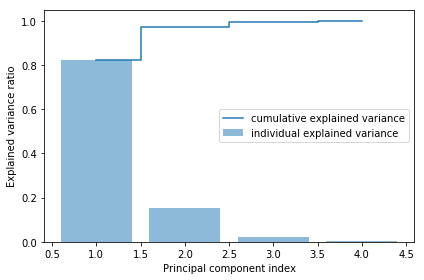


Logistic Regression results of PCA with the number of feature 1
Test set(std) Accuracy: 0.86
Train Set(std) Accuracy: 0.80

Logistic Regression results of PCA with the number of feature 2
Test set(std) Accuracy: 0.83
Train Set(std) Accuracy: 0.81

Logistic Regression results of PCA with the number of feature 3
Test set(std) Accuracy: 0.67
Train Set(std) Accuracy: 0.68

Logistic Regression results of PCA with the number of feature 4
Test set(std) Accuracy: 0.67
Train Set(std) Accuracy: 0.82


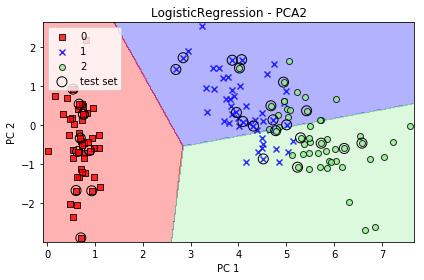

In [106]:
#eigendecomposition of the covariance matrix 
import numpy as np
cov_mat = np.cov(x_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

#select highest eigen vector
w1 = np.hstack((eigen_pairs[0][1][:, np.newaxis]))

w2 = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

w3 = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis]))

w4 = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis],
               eigen_pairs[3][1][:, np.newaxis]))
print('Matrix W:\n', w4)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt


plt.bar(range(1, 5), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 5), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

x_train_pca1 =x_train_std.dot(w1)
x_test_pca1 = x_test_std.dot(w1)

x_train_pca2 =x_train_std.dot(w2)
x_test_pca2 = x_test_std.dot(w2)

x_train_pca3 =x_train_std.dot(w3)
x_test_pca3 = x_test_std.dot(w3)

x_train_pca4 =x_train_std.dot(w4)
x_test_pca4 = x_test_std.dot(w4)


#combining test and train sets for plotting decision boundary
#X_combined_pca1 = np.vstack((x_train_pca1, x_test_pca1))
#y_combined = np.hstack((y_set_train, y_set_test))

X_combined_pca2 = np.vstack((x_train_pca2, x_test_pca2))
y_combined = np.hstack((y_set_train, y_set_test))



PCA1_LR = LRGD(n_iter=2000, eta=0.001).fit(np.array(x_train_pca1).reshape(-1,1), y_train)
PCA2_LR = LRGD(n_iter=2000, eta=0.001).fit(x_train_pca2, y_train)
PCA3_LR = LRGD(n_iter=2000, eta=0.001).fit(x_train_pca3, y_train)
PCA4_LR = LRGD(n_iter=2000, eta=0.001).fit(x_train_pca4, y_train)


y_predict = PCA1_LR.predict(np.array(x_train_pca1).reshape(-1,1))
print('\nLogistic Regression results of PCA with the number of feature 1')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))
y_predict = PCA1_LR.predict(np.array(x_test_pca1).reshape(-1,1))
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))


plot_decision_regions(X=X_combined_pca2, y=y_combined, classifier=PCA2_LR, test_idx=range(120,150))
plt.title('LogisticRegression - PCA2')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
y_predict = PCA2_LR.predict(x_test_pca2)
print('\nLogistic Regression results of PCA with the number of feature 2')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = PCA2_LR.predict(x_train_pca2)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))



y_predict = PCA3_LR.predict(x_test_pca3)
print('\nLogistic Regression results of PCA with the number of feature 3')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = PCA3_LR.predict(x_train_pca3)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))



y_predict = PCA4_LR.predict(x_test_pca4)
print('\nLogistic Regression results of PCA with the number of feature 4')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = PCA4_LR.predict(x_train_pca4)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

plt.show()


SVM results of PCA with the number of feature 1
Test set(std) Accuracy: 0.87
Train Set(std) Accuracy: 0.94

SVM results of PCA with the number of feature 2
Test set(std) Accuracy: 0.87
Train Set(std) Accuracy: 0.94


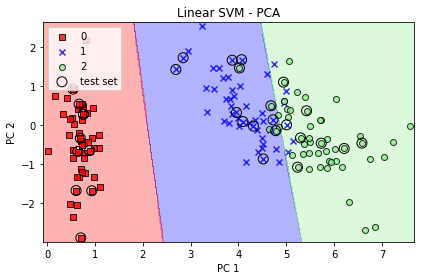


SVM results of PCA with the number of feature 3
Test set(std) Accuracy: 0.97
Train Set(std) Accuracy: 0.97

SVM results of PCA with the number of feature 4
Test set(std) Accuracy: 0.97
Train Set(std) Accuracy: 0.97


In [94]:
from sklearn.svm import SVC

SVM1 = SVC(kernel='linear', C=1.0, random_state=1).fit(np.array(x_train_pca1).reshape(-1,1), y_set_train)
SVM2 = SVC(kernel='linear', C=1.0, random_state=1).fit(x_train_pca2, y_set_train)
SVM3 = SVC(kernel='linear', C=1.0, random_state=1).fit(x_train_pca3, y_set_train)
SVM4 = SVC(kernel='linear', C=1.0, random_state=1).fit(x_train_pca4, y_set_train)


y_predict = SVM1.predict(np.array(x_test_pca1).reshape(-1,1))
print('\nSVM results of PCA with the number of feature 1')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = SVM1.predict(np.array(x_train_pca1).reshape(-1,1))
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))


y_predict = SVM2.predict(x_test_pca2)
print('\nSVM results of PCA with the number of feature 2')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = SVM2.predict(x_train_pca2)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

plot_decision_regions(X_combined_pca2, 
                      y_combined, 
                      classifier=SVM2, 
                      test_idx=range(120, 150))
plt.title('Linear SVM - PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


y_predict = SVM3.predict(x_test_pca3)
print('\nSVM results of PCA with the number of feature 3')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = SVM3.predict(x_train_pca3)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

y_predict = SVM4.predict(x_test_pca4)
print('\nSVM results of PCA with the number of feature 4')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = SVM4.predict(x_train_pca4)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

The PCA transformation of the iris data was not linearly separable as feature label 1 and feature label 2 are mixed in the principal component 1 at the range of 5. Yet, SVM performed much better, finding the good separation point between label 1 and 2. 

LDA using numpy

MV 0: [-1.0249  0.8122  1.4575  0.2375]

MV 1: [ 0.1171 -0.6167  4.295   1.3325]

MV 2: [ 1.0017 -0.1307  5.6175  2.04  ]

Within-class scatter matrix: 4x4
Between-class scatter matrix: 4x4


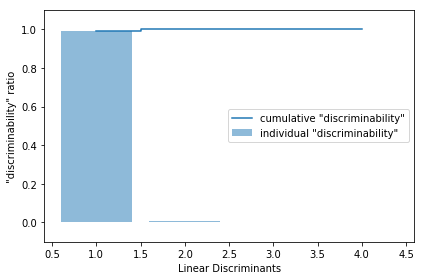

Matrix W4:
 [[-0.1815 -0.1234 -0.8521  0.8196]
 [-0.1793 -0.2641  0.254  -0.1645]
 [ 0.6608  0.3616  0.4559 -0.2184]
 [ 0.7058 -0.8856  0.0387 -0.5035]]


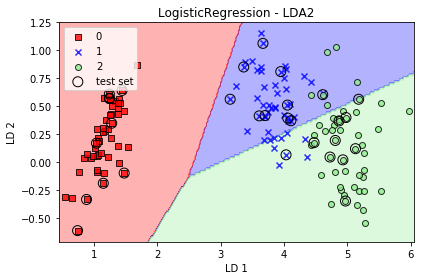


Logistic Regression results of LDA with the number of feature 1
Test set(std) Accuracy: 0.87
Train Set(std) Accuracy: 0.90

Logistic Regression results of LDA with the number of feature 2
Test set(std) Accuracy: 0.93
Train Set(std) Accuracy: 0.91

Logistic Regression results of LDA with the number of feature 3
Test set(std) Accuracy: 0.70
Train Set(std) Accuracy: 0.68

Logistic Regression results of LDA with the number of feature 4
Test set(std) Accuracy: 0.70
Train Set(std) Accuracy: 0.82


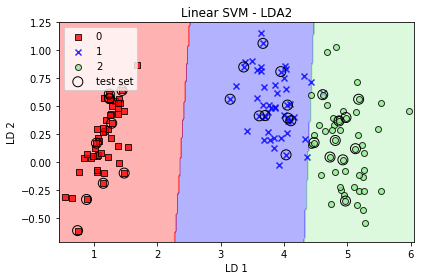


SVM results of LDA with the number of feature 1
Test set(std) Accuracy: 1.00
Train Set(std) Accuracy: 0.98

SVM results of LDA with the number of feature 2
Test set(std) Accuracy: 1.00
Train Set(std) Accuracy: 0.99

SVM results of LDA with the number of feature 3
Test set(std) Accuracy: 1.00
Train Set(std) Accuracy: 0.98

SVM results of LDA with the number of feature 4
Test set(std) Accuracy: 1.00
Train Set(std) Accuracy: 0.98


In [110]:

#combining training data with the label

import numpy as np
np.set_printoptions(precision=4)

mean_vecs = []
for label in np.arange(3):
    mean_vecs.append(np.mean(x_train_std[y_set_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label]))
    
d = 4 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(np.arange(3), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in x_train_std[y_set_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

x_train_std = np.array(x_train_std)
mean_overall = np.mean(x_train_std, axis=0)
d = 4
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = x_train_std[np.array(y_set_train) == i, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))


eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)


tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 5), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 5), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_07.png', dpi=300)
plt.show()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

w1 = np.hstack((eigen_pairs[0][1][:, np.newaxis].real))

w2 = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))

w3 = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real,
               eigen_pairs[2][1][:, np.newaxis].real))

w4 = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real,
               eigen_pairs[2][1][:, np.newaxis].real,
               eigen_pairs[3][1][:, np.newaxis].real))

#plotting
print('Matrix W4:\n', w4)
X_train_lda1 = x_train_std.dot(w1)
X_train_lda2 = x_train_std.dot(w2)
X_train_lda3 = x_train_std.dot(w3)
X_train_lda4 = x_train_std.dot(w4)

X_test_lda1 = x_test_std.dot(w1)
X_test_lda2 = x_test_std.dot(w2)
X_test_lda3 = x_test_std.dot(w3)
X_test_lda4 = x_test_std.dot(w4)

X_combined_lda2 = np.vstack((X_train_lda2, X_test_lda2))



LDA1_LR = LRGD(n_iter=2000, eta=0.001).fit(np.array(X_train_lda1).reshape(-1,1), y_train)
LDA2_LR = LRGD(n_iter=2000, eta=0.001).fit(X_train_lda2, y_train)
LDA3_LR = LRGD(n_iter=2000, eta=0.001).fit(X_train_lda3, y_train)
LDA4_LR = LRGD(n_iter=2000, eta=0.001).fit(X_train_lda4, y_train)


plot_decision_regions(X=X_combined_lda2, y=y_combined, classifier=LDA2_LR, test_idx=range(120,150))
plt.title('LogisticRegression - LDA2')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# plt.savefig('images/02_14_1.png', dpi=300)
y_predict = LDA1_LR.predict(np.array(X_test_lda1).reshape(-1,1))
print('\nLogistic Regression results of LDA with the number of feature 1')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = LDA1_LR.predict(np.array(X_train_lda1).reshape(-1,1))
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

print('\nLogistic Regression results of LDA with the number of feature 2')
y_predict = LDA2_LR.predict(X_test_lda2)
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = LDA2_LR.predict(X_train_lda2)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

print('\nLogistic Regression results of LDA with the number of feature 3')
y_predict = LDA3_LR.predict(X_test_lda3)
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = LDA3_LR.predict(X_train_lda3)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

print('\nLogistic Regression results of LDA with the number of feature 4')
y_predict = LDA4_LR.predict(X_test_lda4)
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = LDA4_LR.predict(X_train_lda4)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))



SVM1 = SVC(kernel='linear', C=1.0, random_state=1).fit(np.array(X_train_lda1).reshape(-1,1), y_set_train)
SVM2 = SVC(kernel='linear', C=1.0, random_state=1).fit(X_train_lda2, y_set_train)
SVM3 = SVC(kernel='linear', C=1.0, random_state=1).fit(X_train_lda3, y_set_train)
SVM4 = SVC(kernel='linear', C=1.0, random_state=1).fit(X_train_lda4, y_set_train)



plot_decision_regions(X_combined_lda2, 
                      y_combined, 
                      classifier=SVM2, 
                      test_idx=range(120, 150))
plt.title('Linear SVM - LDA2')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print('\nSVM results of LDA with the number of feature 1')
y_predict = SVM1.predict(np.array(X_test_lda1).reshape(-1,1))
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = SVM1.predict(np.array(X_train_lda1).reshape(-1,1))
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

print('\nSVM results of LDA with the number of feature 2')
y_predict = SVM2.predict(X_test_lda2)
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = SVM2.predict(X_train_lda2)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

print('\nSVM results of LDA with the number of feature 3')
y_predict = SVM3.predict(X_test_lda3)
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = SVM3.predict(X_train_lda3)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

y_predict = SVM4.predict(X_test_lda4)
print('\nSVM results of LDA with the number of feature 4')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = SVM4.predict(X_train_lda4)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

LDA successfully linerally separated the iris data as the decision boundary of the all the labels is clearly visiable. Again, SVM performed much better than the logistic regression. 

In [74]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
        
    gamma: float
      Tuning parameter of the RBF kernel
        
    n_components: int
      Number of principal components to return

    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset   

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, i]
                            for i in range(n_components)))

    return X_pc


Logistic Regression results of Kernel PCA with the number of feature 2
Test set(std) Accuracy: 0.50
Train Set(std) Accuracy: 0.53


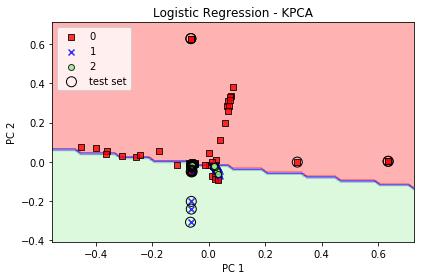


Logistic Regression results of Kernel PCA with the number of feature 1
Test set(std) Accuracy: 0.33
Train Set(std) Accuracy: 0.33

Logistic Regression results of Kernel PCA with the number of feature 3
Test set(std) Accuracy: 0.40
Train Set(std) Accuracy: 0.53

Logistic Regression results of Kernel PCA with the number of feature 4
Test set(std) Accuracy: 0.40
Train Set(std) Accuracy: 0.40


In [109]:

X_train_kpca4 = rbf_kernel_pca(x_train_std, gamma=15, n_components=4)
X_test_kpca4 = rbf_kernel_pca(x_test_std, gamma=15, n_components=4)
X_train_kpca3 = rbf_kernel_pca(x_train_std, gamma=15, n_components=3)
X_test_kpca3 = rbf_kernel_pca(x_test_std, gamma=15, n_components=3)
X_train_kpca2 = rbf_kernel_pca(x_train_std, gamma=15, n_components=2)
X_test_kpca2 = rbf_kernel_pca(x_test_std, gamma=15, n_components=2)
X_train_kpca1 = rbf_kernel_pca(x_train_std, gamma=15, n_components=1)
X_test_kpca1 = rbf_kernel_pca(x_test_std, gamma=15, n_components=1)

X_test_kpca1 = np.array(X_test_kpca1).reshape(-1,1)
X_train_kpca1 = np.array(X_train_kpca1).reshape(-1,1)


kpca4_LR = LRGD(n_iter=2000, eta=0.01).fit(X_train_kpca4, y_train)
kpca3_LR = LRGD(n_iter=2000, eta=0.01).fit(X_train_kpca3, y_train)
kpca2_LR = LRGD(n_iter=2000, eta=0.01).fit(X_train_kpca2, y_train)
kpca1_LR = LRGD(n_iter=2000, eta=0.01).fit(X_train_kpca1, y_train)

X_combined_kpca2 = np.vstack((X_train_kpca2, X_test_kpca2))
y_combined = np.hstack((y_set_train, y_set_test))

y_predict = kpca2_LR.predict(X_test_kpca2)
print('\nLogistic Regression results of Kernel PCA with the number of feature 2')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = kpca2_LR.predict(X_train_kpca2)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

plot_decision_regions(X_combined_kpca2, 
                      y_combined, 
                      classifier=kpca2_LR, 
                      test_idx=range(120, 150))
plt.title('Logistic Regression - KPCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print('\nLogistic Regression results of Kernel PCA with the number of feature 1')
y_predict = kpca1_LR.predict(X_test_kpca1)
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = kpca1_LR.predict(X_train_kpca1)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

print('\nLogistic Regression results of Kernel PCA with the number of feature 3')
y_predict = kpca3_LR.predict(X_test_kpca3)
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = kpca3_LR.predict(X_train_kpca3)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

print('\nLogistic Regression results of Kernel PCA with the number of feature 4')
y_predict = kpca4_LR.predict(X_test_kpca4)
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = kpca4_LR.predict(X_train_kpca4)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))


SVM result of Kernel PCA with the number of feature 1
Test set(std) Accuracy: 0.33
Train Set(std) Accuracy: 0.47

SVM result of Kernel PCA with the number of feature 2
Test set(std) Accuracy: 0.50
Train Set(std) Accuracy: 0.53

SVM result of Kernel PCA with the number of feature 3
Test set(std) Accuracy: 0.43
Train Set(std) Accuracy: 0.57

SVM result of Kernel PCA with the number of feature 4
Test set(std) Accuracy: 0.40
Train Set(std) Accuracy: 0.57


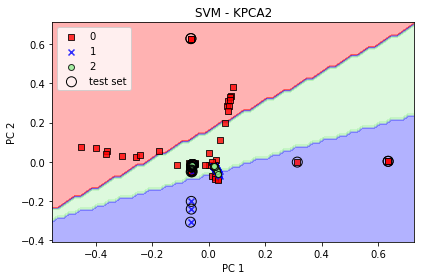

In [32]:
SVM1 = SVC(kernel='linear', C=1.0, random_state=1).fit(X_train_kpca1, y_set_train)
SVM2 = SVC(kernel='linear', C=1.0, random_state=1).fit(X_train_kpca2, y_set_train)
SVM3 = SVC(kernel='linear', C=1.0, random_state=1).fit(X_train_kpca3, y_set_train)
SVM4 = SVC(kernel='linear', C=1.0, random_state=1).fit(X_train_kpca4, y_set_train)


y_predict = SVM1.predict(X_test_kpca1)
print('\nSVM result of Kernel PCA with the number of feature 1')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = SVM1.predict(X_train_kpca1)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

y_predict = SVM2.predict(X_test_kpca2)
print('\nSVM result of Kernel PCA with the number of feature 2')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = SVM2.predict(X_train_kpca2)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

y_predict = SVM3.predict(X_test_kpca3)
print('\nSVM result of Kernel PCA with the number of feature 3')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = SVM3.predict(X_train_kpca3)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))
print('\nSVM result of Kernel PCA with the number of feature 4')
y_predict = SVM4.predict(X_test_kpca4)
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = SVM4.predict(X_train_kpca4)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

plot_decision_regions(X_combined_kpca2, 
                      y_combined, 
                      classifier=SVM2, 
                      test_idx=range(120, 150))
plt.title('SVM - KPCA2')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The kernel PCA was not able to accurately classify the iris data. The accuracy and the decision boundary are both very poor. 